In [1]:
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random
import pickle

In [2]:
base_dir = "./ranzcr_clip_catheter_line_classification/"
train_df = pd.read_csv(os.path.join(base_dir, "train.csv"))

#concat all the labels into a single number
target_cols = train_df.drop(['StudyInstanceUID', 'PatientID'],axis=1).columns.values.tolist()
targets = train_df[target_cols].astype(str)
# create a new col to store the label
train_df['combined_label'] = ''
for i in range(targets.shape[1]):
    train_df['combined_label'] += targets.iloc[:,i]
# how many of each label there are
print(train_df.combined_label.value_counts())
#encode training labels
train_df['combined_label'] = LabelEncoder().fit_transform(train_df['combined_label'])


00000000010    12763
00000000100     4038
00000001000     1678
00100010010     1428
00000000110      973
               ...  
00000010111        1
10010000000        1
00101010010        1
00010000111        1
10001000010        1
Name: combined_label, Length: 211, dtype: int64


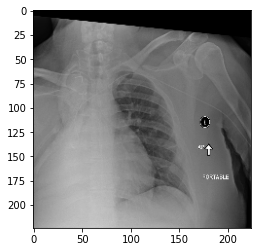

In [3]:
def load_resize_training_data(imageSize=224, numSamples = 10000):
    path = os.path.join(base_dir, "train/")
    trainingData = []
    #i=0
    for img in os.listdir(path):
        #if i==numSamples:
            #break
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_array = cv2.resize(img_array, (imageSize, imageSize))
        trainingData.append([(resized_array), train_df.at[i, 'combined_label']])
        #i+=1

    plt.imshow(trainingData[0][0], cmap="gray")

    return trainingData

data = load_resize_training_data()

In [4]:
#shuffle dataset
random.shuffle(data)
data=np.array(data)
#save x data
pickle_out=open("X.pickle", "wb")
pickle.dump(data[:,0], pickle_out)
pickle_out.close()
#save y data
pickle_out=open("y.pickle", "wb")
pickle.dump(data[:,1], pickle_out)
pickle_out.close()



<ipython-input-4-d291673204f7>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data=np.array(data)
